Şarap uzmanları, belirli bağlardan gelen şarapları koku ve tat yoluyla tanımlayabilirler, ancak farklı şaraplara bireysel özelliklerini veren faktörler aslında kimyasal bileşimlerine dayanır.

Bu görevde, şarap örneklerinin kimyasal ve görsel özelliklerini analiz etmek ve çeşitlerine (üzüm çeşidi) göre sınıflandırmak için bir sınıflandırma modeli eğitmeniz gerekir.

## Verileri keşfetme
* **0** (A çeşidi)
* **1** (B çeşidi)
* **2** (C çeşidi)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("wine.csv")
df.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,1
147,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625,2
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,2
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830,2
144,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855,2
114,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385,1
96,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625,1
157,12.45,3.03,2.64,27.0,97,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880,2
39,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760,0
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,0


## Özellikler ve Etiket

In [5]:
features = ["Alcohol", "Malic_acid", "Ash", "Alcalinity", "Magnesium", "Phenols", "Flavanoids", "Nonflavanoids", "Proanthocyanins", "Color_intensity", "Hue", "OD280_315_of_diluted_wines", "Proline"]
label = "WineVariety"

X, y = df[features].values, df[label].values

for n in range(0,4):
    print("Wine", str(n + 1), "\n Features: ", list(X[n]), "\n Label: ", y[n])

Wine 1 
 Features:  [14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0] 
 Label:  0
Wine 2 
 Features:  [13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4, 1050.0] 
 Label:  0
Wine 3 
 Features:  [13.16, 2.36, 2.67, 18.6, 101.0, 2.8, 3.24, 0.3, 2.81, 5.68, 1.03, 3.17, 1185.0] 
 Label:  0
Wine 4 
 Features:  [14.37, 1.95, 2.5, 16.8, 113.0, 3.85, 3.49, 0.24, 2.18, 7.8, 0.86, 3.45, 1480.0] 
 Label:  0


## Özellik dağılımlarını karşılaştırma

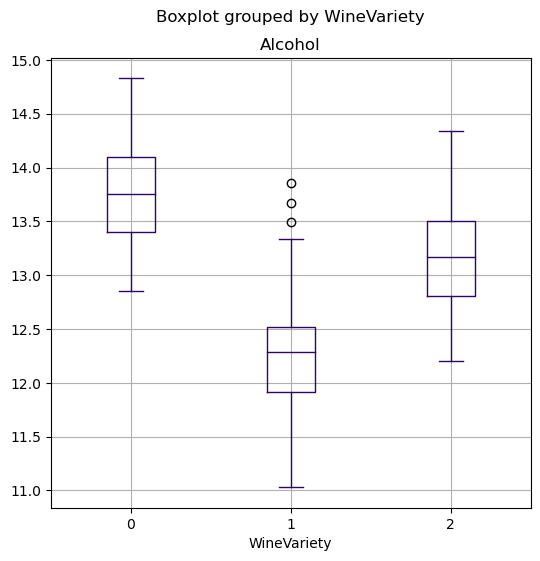

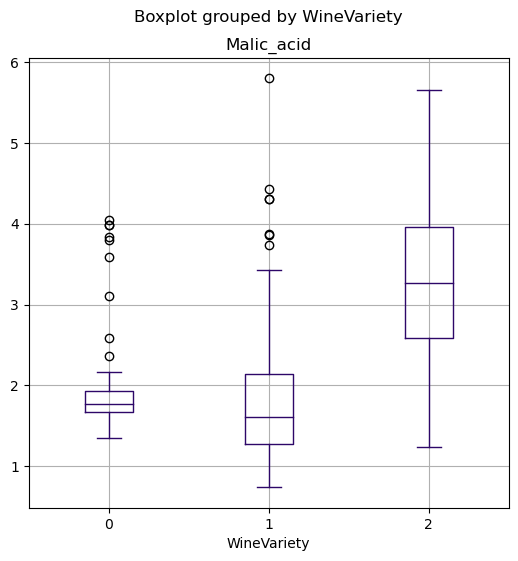

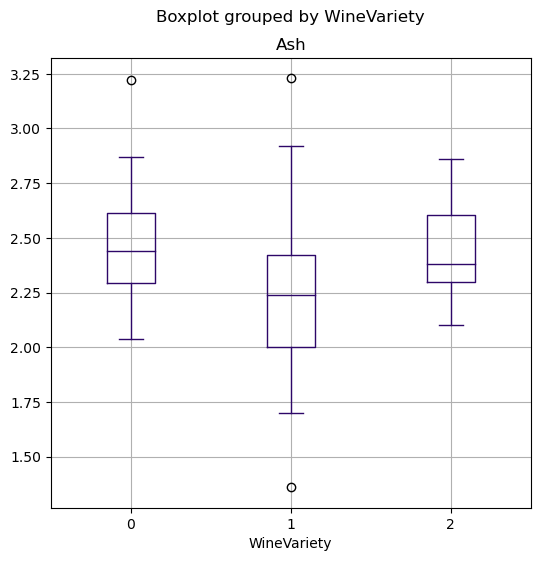

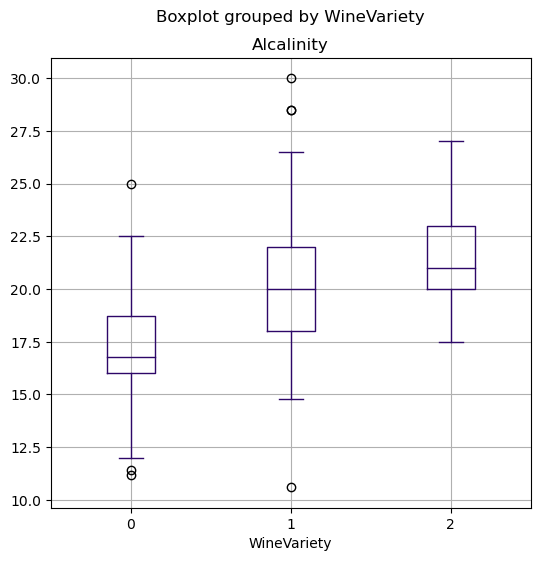

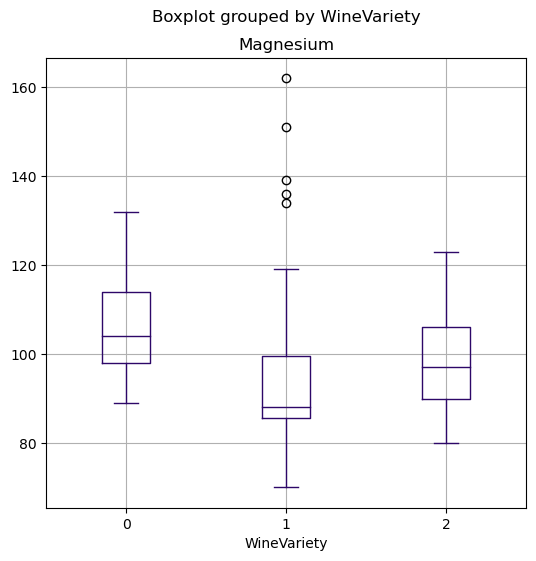

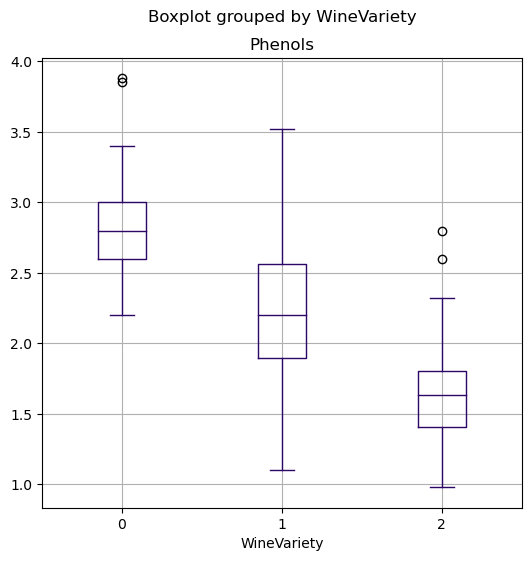

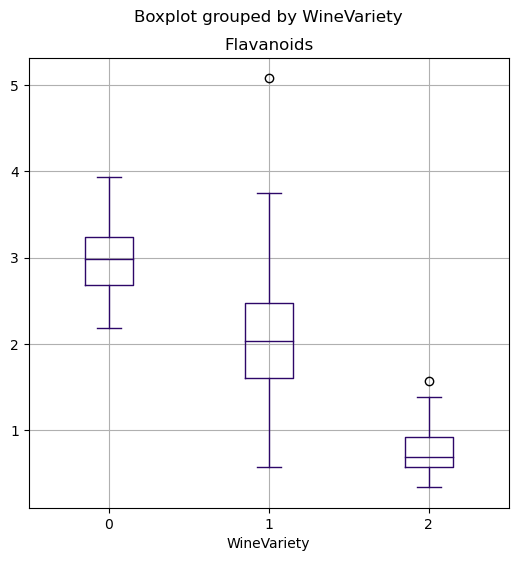

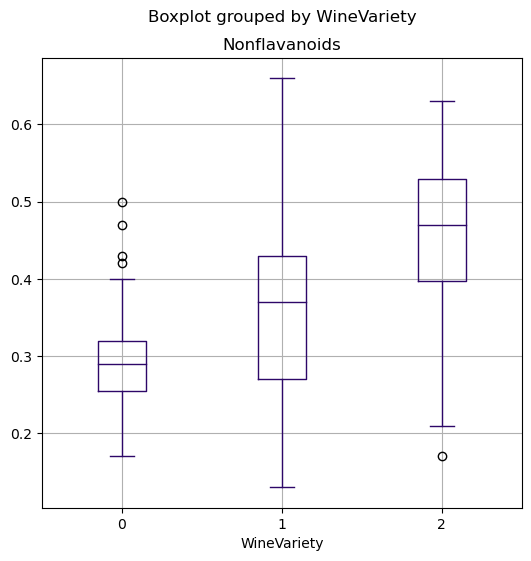

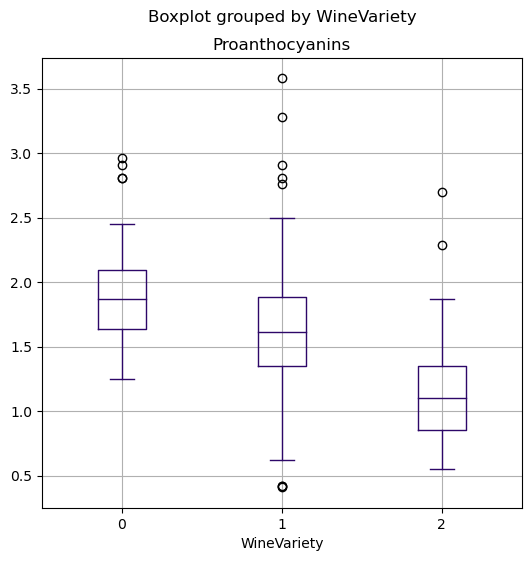

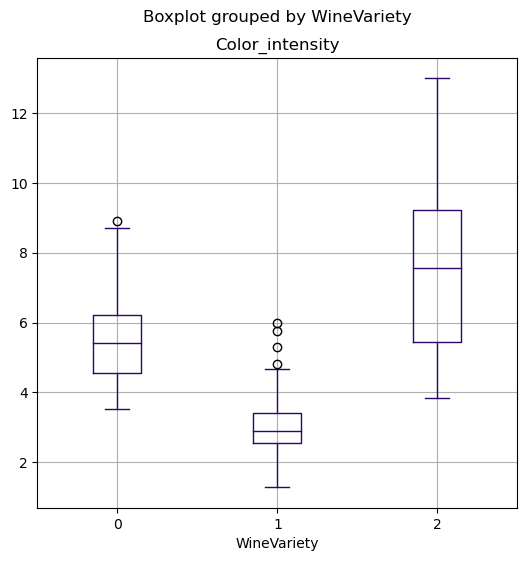

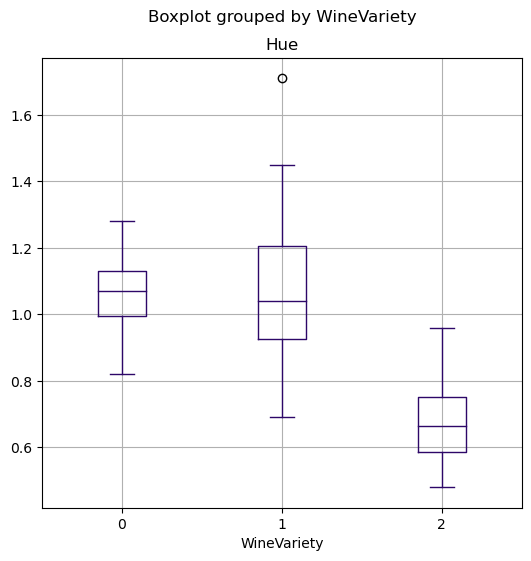

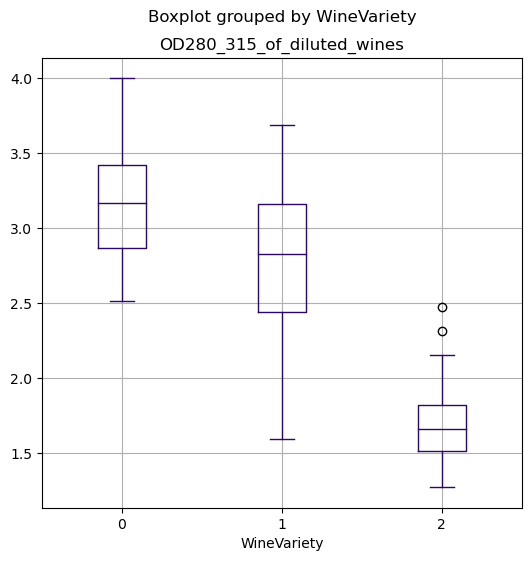

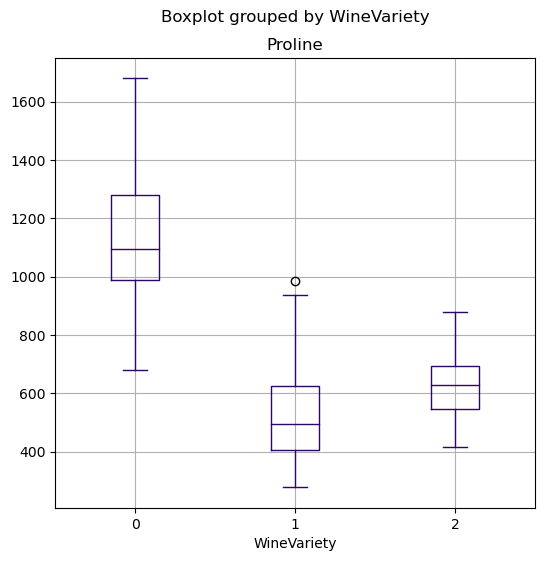

In [6]:
for col in features:
    df.boxplot(column=col, by=label, figsize=(6,6), color="#2d0768")
    plt.title(col)
plt.show()    

## Verileri eğitim ve doğrulama için ayırma

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print("Training cases: %d\nTest cases: %d" % (X_train.shape[0], X_test.shape[0]))

Training cases: 124
Test cases: 54


## Özellikleri normalleştirme ve modeli eğitme

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [12]:
feature_columns = [0,1,2,3,4,5,6]
feature_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(transformers=[("preprocess", feature_transformer, feature_columns)])

pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("regressor", LogisticRegression(solver="lbfgs", multi_class="auto"))])

model = pipeline.fit(X_train, y_train)
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('regressor', LogisticRegression())])


## Modeli değerlendirme

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

Overall Accuracy:  0.9814814814814815
Overall Precision:  0.9855072463768115
Overall Recall:  0.9743589743589745


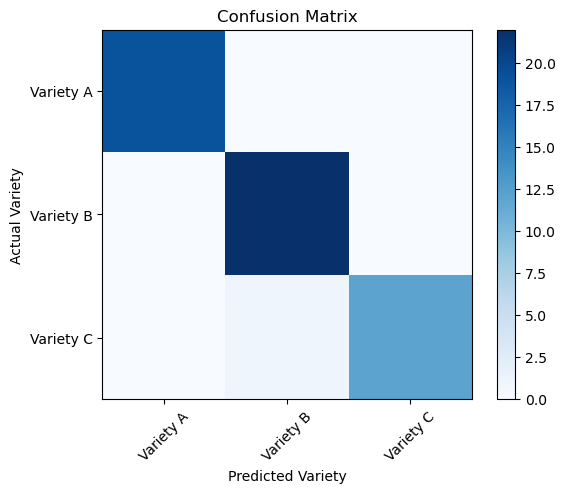

In [14]:
predictions = model.predict(X_test)

print("Overall Accuracy: ", accuracy_score(y_test, predictions))
print("Overall Precision: ", precision_score(y_test, predictions, average="macro"))
print("Overall Recall: ", recall_score(y_test, predictions, average="macro"))

cm = confusion_matrix(y_test, predictions)
classes = ["Variety A", "Variety B", "Variety C"]
plt.imshow(cm, interpolation="nearest", cmap="Blues")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

Average AUC:  1.0


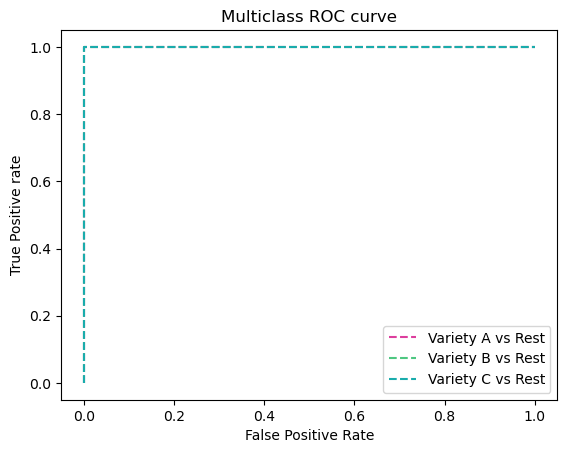

In [17]:
probabilities = model.predict_proba(X_test)

auc = roc_auc_score(y_test, probabilities, multi_class="ovr")
print("Average AUC: ", auc)

fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle="--",color="#dc3e9d", label=classes[0] + " vs Rest")
plt.plot(fpr[1], tpr[1], linestyle="--",color="#4ec781", label=classes[1] + " vs Rest")
plt.plot(fpr[2], tpr[2], linestyle="--",color="#19acac", label=classes[2] + " vs Rest")
plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()    

## Modeli yeni veri gözlemi ile kullanma

In [18]:
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

predictions = model.predict(x_new)

for prediction in predictions:
    print(prediction, "(" + classes[prediction] + ")")

0 (Variety A)
1 (Variety B)
